<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/main/model__selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the datasets
url1 = '/content/drive/MyDrive/DSGP_User/Pre Processed data/preprocessed_stock_report 1.xlsx'
url2 = '/content/drive/MyDrive/DSGP_User/Pre Processed data/preprocessed_stock_report 2.xlsx'
url3 = '/content/drive/MyDrive/DSGP_User/Pre Processed data/preprocessed_stock_report 3.xlsx'

data1 = pd.read_excel(url1)
data2 = pd.read_excel(url2)
data3 = pd.read_excel(url3)

In [4]:
# Display the first few rows of each dataset
print("Dataset 1:")
print(data1.head())
print("\nDataset 2:")
print(data2.head())
print("\nDataset 3:")
print(data3.head())

Dataset 1:
   Customer name  Risk Level
0             18           1
1             19           1
2             20           1
3             27           1
4             15           1

Dataset 2:
  Transaction Date  Risk Level
0       2024-10-10           0
1       2024-10-11           1
2       2024-10-11           0
3       2024-10-15           0
4       2024-10-16           1

Dataset 3:
   Product code  Customer name  Risk Level
0             0             12           2
1             0              4           2
2             0             19           2
3             0             15           2
4             0              0           0


In [5]:
# Prepare data (assuming 'Risk Level' is the target variable)
# For dataset 1
X1 = data1.drop('Risk Level', axis=1)  # Features
y1 = data1['Risk Level']  # Target

# For dataset 2 (dropping 'Product code' as it's not needed for modeling)
X3 = data3.drop(['Risk Level', 'Product code'], axis=1)  # Features
y3 = data3['Risk Level']  # Target

# For dataset 3 - Convert 'Transaction Date' to numeric (e.g., timestamp)
data2['Transaction Date'] = pd.to_datetime(data2['Transaction Date'])
data2['Transaction Date'] = data2['Transaction Date'].astype(int) / 10**9  # Convert to seconds since epoch

# For dataset 3 (assuming it has a similar structure)
X2 = data2.drop('Risk Level', axis=1)  # Features
y2 = data2['Risk Level']  # Target

# Combine datasets
X_combined = pd.concat([X1, X2, X3], ignore_index=True)
y_combined = pd.concat([y1, y2, y3], ignore_index=True)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_combined_imputed = imputer.fit_transform(X_combined)

# Convert back to DataFrame to retain feature names
X_combined_imputed_df = pd.DataFrame(X_combined_imputed, columns=X_combined.columns)

# Split the combined dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.78      0.54      0.64        13
           2       0.33      0.43      0.38         7

    accuracy                           0.56        27
   macro avg       0.56      0.56      0.55        27
weighted avg       0.60      0.56      0.57        27

Accuracy: 0.56
Recall: 0.56
Precision: 0.60
F1 Score: 0.57
ROC AUC: 0.64


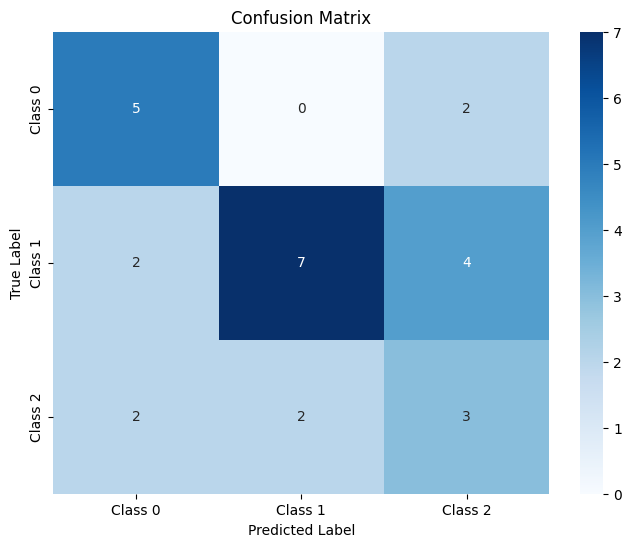

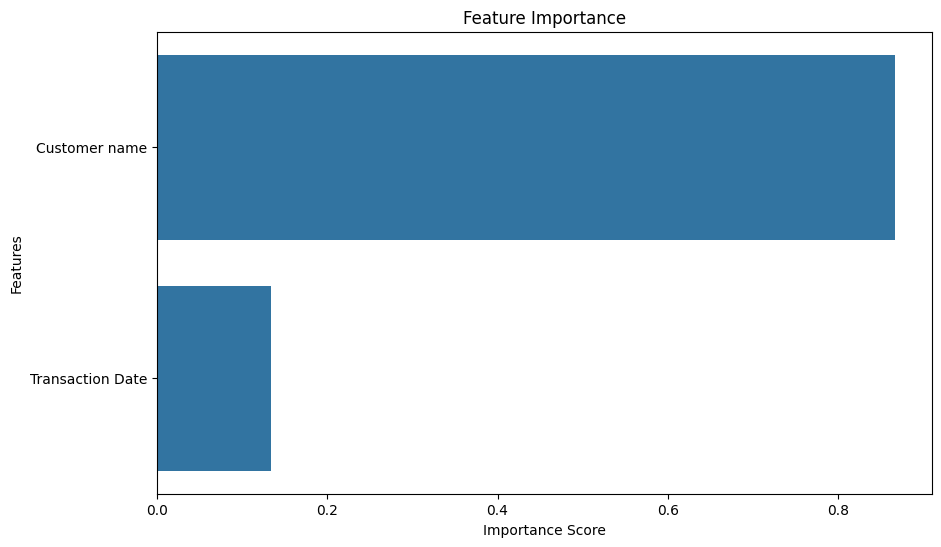

In [8]:
# Random Forest

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr', average='weighted') # Added multi_class='ovr'

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
features = X_combined.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [9]:
import joblib

model_save_path = '/content/drive/MyDrive/DSGP_User/Pre Processed data/random_forest_model.pkl'

# Save the model
joblib.dump(rf_model, model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to /content/drive/MyDrive/DSGP_User/Pre Processed data/random_forest_model.pkl


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.70      0.54      0.61        13
           2       0.33      0.43      0.38         7

    accuracy                           0.52        27
   macro avg       0.51      0.51      0.51        27
weighted avg       0.55      0.52      0.53        27

Accuracy: 0.52
Recall: 0.52
Precision: 0.55
F1 Score: 0.53
ROC AUC: 0.58


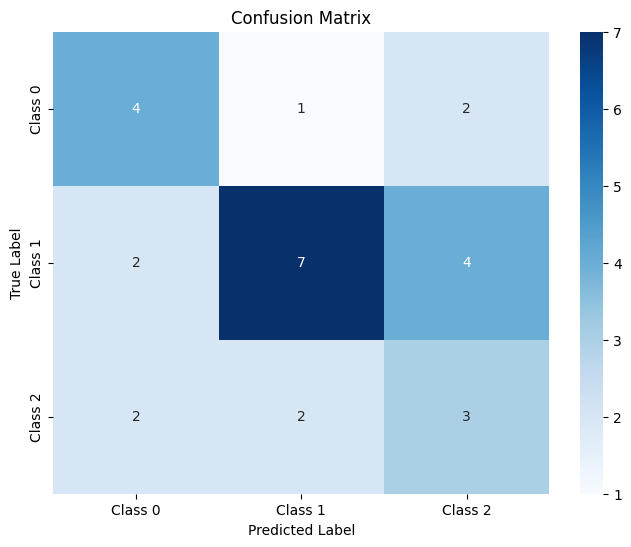

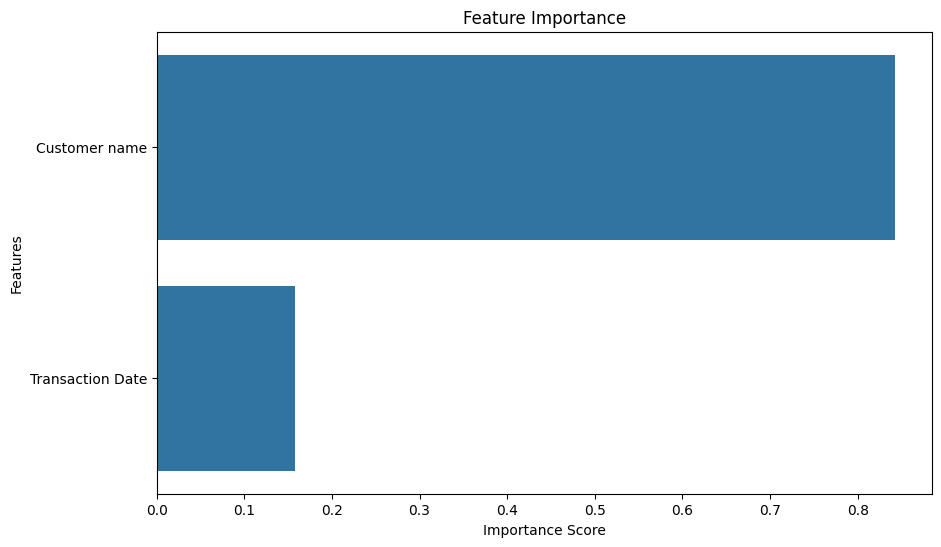

In [10]:
# Gradient Boosting
# Use the imputed DataFrame instead of the original X_combined
X_train, X_test, y_train, y_test = train_test_split(X_combined_imputed_df, y_combined, test_size=0.3, random_state=42)

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr', average='weighted')

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance Visualization
feature_importances = gb_model.feature_importances_
features = X_combined.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.26      1.00      0.41         7
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         7

    accuracy                           0.26        27
   macro avg       0.09      0.33      0.14        27
weighted avg       0.07      0.26      0.11        27

Accuracy: 0.26
Recall: 0.26
Precision: 0.07
F1 Score: 0.11
ROC AUC: 0.58


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

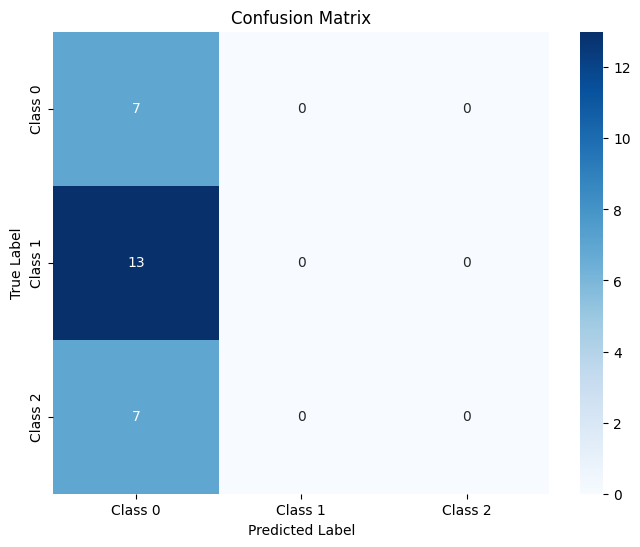

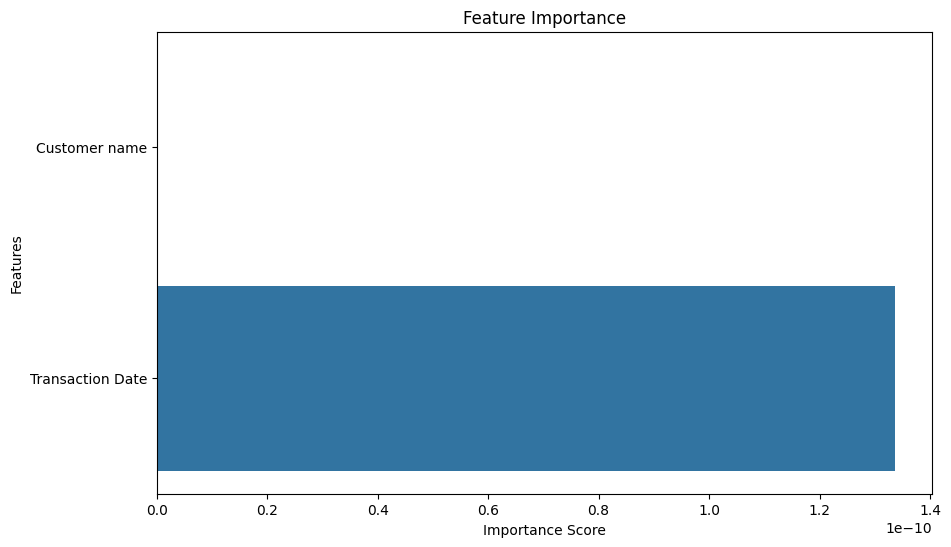

In [11]:
# Logistic Regression
# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr', average='weighted')


# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance Visualization (Logistic Regression coefficients)
feature_importances = log_reg_model.coef_[0]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X_combined.columns)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 1
[LightGBM] [Info] Start training from score -0.916291
[LightGBM] [Info] Start training from score -0.916291
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

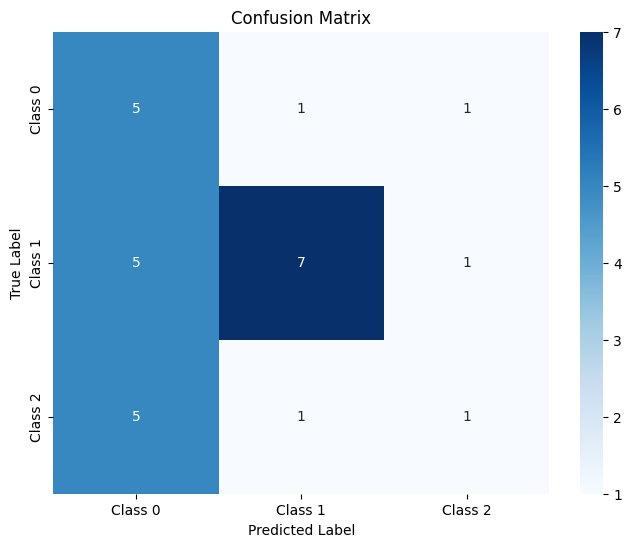

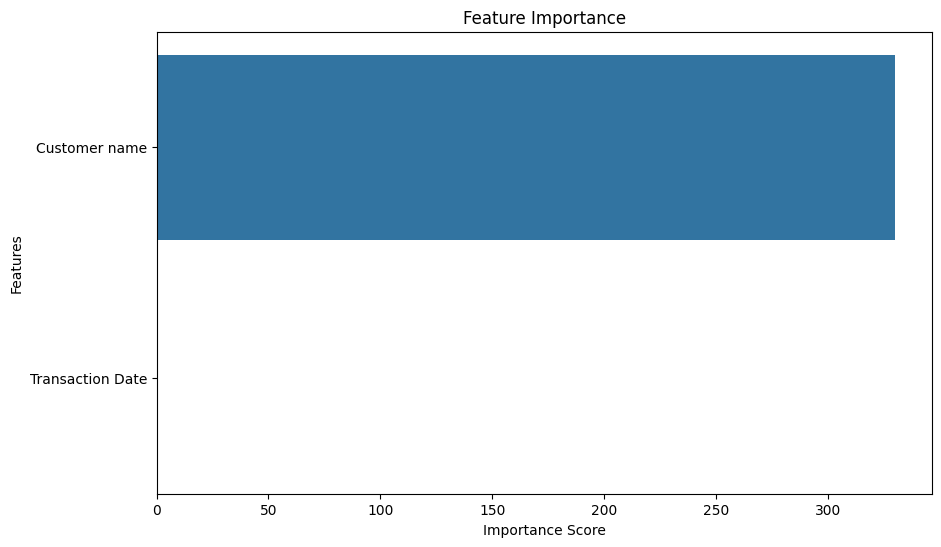

In [12]:
# LightGBM
# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr', average='weighted')


# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance Visualization
feature_importances = lgb_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X_combined.columns)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()